# Imports

In [1]:
import torch
from torch import nn
from torchvision import transforms
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST

from helper_train import train_conv_autoencoder
from helper_plot import plot_conv_autoencoder_reconstructions

# Config

In [2]:
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
BATCH_SIZE = 128
NUM_EPOCHS = 20
lr = 0.001

# Dataset

In [3]:
data_transform = transforms.Compose([transforms.ToTensor()])

mnist_train = MNIST('../Dataset', train = True, download = True, transform = data_transform)
train_loader = DataLoader(dataset = mnist_train, batch_size = BATCH_SIZE, shuffle = True)

images, labels = next(iter(train_loader))
print(torch.min(images), torch.max(images))

tensor(0.) tensor(1.)


# Convolutional Autoencoder

In [4]:
class Reshape(nn.Module):
    def __init__(self, *args):
        super().__init__()
        self.shape = args

    def forward(self, x):
        return x.view(self.shape)


class ConvAutoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.encoder = nn.Sequential( 
                nn.Conv2d(1, 16, kernel_size = 3, stride = 2, padding = 1), # 1*28*28 -> 16*14*14
                nn.LeakyReLU(0.01),
                nn.Conv2d(16, 32, kernel_size = 3, stride = 2, padding = 1), #16*14*14 -> 32*7*7
                nn.LeakyReLU(0.01),
                nn.Conv2d(32, 64, kernel_size = 3, stride = 1, padding = 1), #32*7*7 -> 64*7*7
                nn.LeakyReLU(0.01),
                nn.Flatten(), # 64*7*7 -> 3136
                nn.Linear(3136, 5)
        )


        self.decoder = nn.Sequential(
                torch.nn.Linear(5, 3136),
                Reshape(-1, 64, 7, 7),
                nn.ConvTranspose2d(64, 32, kernel_size = 3, stride = 1, padding = 1), 
                nn.LeakyReLU(0.01),
                nn.ConvTranspose2d(32, 16, kernel_size = 3, stride = 2, padding = 1, output_padding = 1),           
                nn.LeakyReLU(0.01),
                nn.ConvTranspose2d(16, 1, kernel_size = 3, stride = 2, padding = 1, output_padding = 1),
                nn.Sigmoid()              
                )

    def forward(self, x):
        endoced = self.encoder(x)
        decoded = self.decoder(endoced)
        return decoded

In [5]:
model = ConvAutoencoder().to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr = lr)

# Training

In [7]:
train_conv_autoencoder(model, train_loader, optimizer, NUM_EPOCHS)

100%|██████████| 469/469 [00:07<00:00, 63.79it/s]


Epoch: 001/020 | Loss: 0.0242


100%|██████████| 469/469 [00:06<00:00, 72.70it/s]


Epoch: 002/020 | Loss: 0.0241


100%|██████████| 469/469 [00:08<00:00, 52.42it/s]


Epoch: 003/020 | Loss: 0.0240


100%|██████████| 469/469 [00:08<00:00, 52.59it/s]


Epoch: 004/020 | Loss: 0.0239


100%|██████████| 469/469 [00:08<00:00, 53.63it/s]


Epoch: 005/020 | Loss: 0.0238


100%|██████████| 469/469 [00:09<00:00, 50.28it/s]


Epoch: 006/020 | Loss: 0.0237


100%|██████████| 469/469 [00:08<00:00, 52.17it/s]


Epoch: 007/020 | Loss: 0.0237


100%|██████████| 469/469 [00:09<00:00, 48.48it/s]


Epoch: 008/020 | Loss: 0.0236


100%|██████████| 469/469 [00:09<00:00, 48.99it/s]


Epoch: 009/020 | Loss: 0.0235


100%|██████████| 469/469 [00:09<00:00, 50.36it/s]


Epoch: 010/020 | Loss: 0.0235


100%|██████████| 469/469 [00:09<00:00, 49.97it/s]


Epoch: 011/020 | Loss: 0.0234


100%|██████████| 469/469 [00:09<00:00, 49.85it/s]


Epoch: 012/020 | Loss: 0.0233


100%|██████████| 469/469 [00:09<00:00, 49.98it/s]


Epoch: 013/020 | Loss: 0.0233


100%|██████████| 469/469 [00:09<00:00, 49.76it/s]


Epoch: 014/020 | Loss: 0.0233


100%|██████████| 469/469 [00:09<00:00, 49.62it/s]


Epoch: 015/020 | Loss: 0.0232


100%|██████████| 469/469 [00:09<00:00, 49.59it/s]


Epoch: 016/020 | Loss: 0.0232


100%|██████████| 469/469 [00:09<00:00, 47.83it/s]


Epoch: 017/020 | Loss: 0.0231


100%|██████████| 469/469 [00:08<00:00, 52.24it/s]


Epoch: 018/020 | Loss: 0.0231


100%|██████████| 469/469 [00:08<00:00, 52.63it/s]


Epoch: 019/020 | Loss: 0.0230


100%|██████████| 469/469 [00:09<00:00, 50.81it/s]

Epoch: 020/020 | Loss: 0.0230


# Evaluation

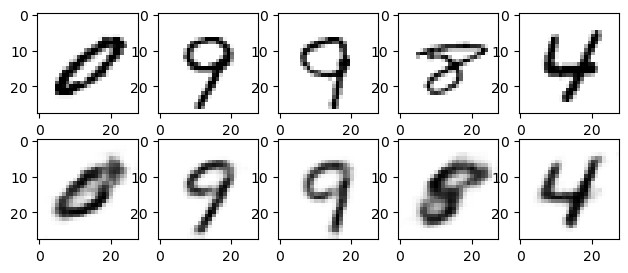

In [13]:
plot_conv_autoencoder_reconstructions(model, train_loader)